In [1]:
#importing libraries which are all requried

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the dataset and checking the first five rows

ln = pd.read_csv("day.csv")

print(ln.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [3]:
#checking the count of rows and columns
ln.shape

(730, 16)

In [4]:
#To see overall idea of data
ln.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# check for columns which having null-values and also shows the count 
ln.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing/null values in the dataset

In [6]:
#By seeing the overall data we got idea on unwanted columns so we going to remove them.

#instant column contains just the index values so we're dropping.
ln.drop(['instant'],axis=1,inplace=True)

print("After instant row removed\n")
print(ln.head())

After instant row removed

       dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  01-01-2018       1   0     1        0        6           0           2   
1  02-01-2018       1   0     1        0        0           0           2   
2  03-01-2018       1   0     1        0        1           1           1   
3  04-01-2018       1   0     1        0        2           1           1   
4  05-01-2018       1   0     1        0        3           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600  


In [7]:
#there wont be much useful with coulumn dteday so we're dropping that too
ln.drop(['dteday'],axis=1,inplace=True)

print("After dteday removed\n")
print(ln.head())

After dteday removed

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600  


In [8]:
ln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


# EDA

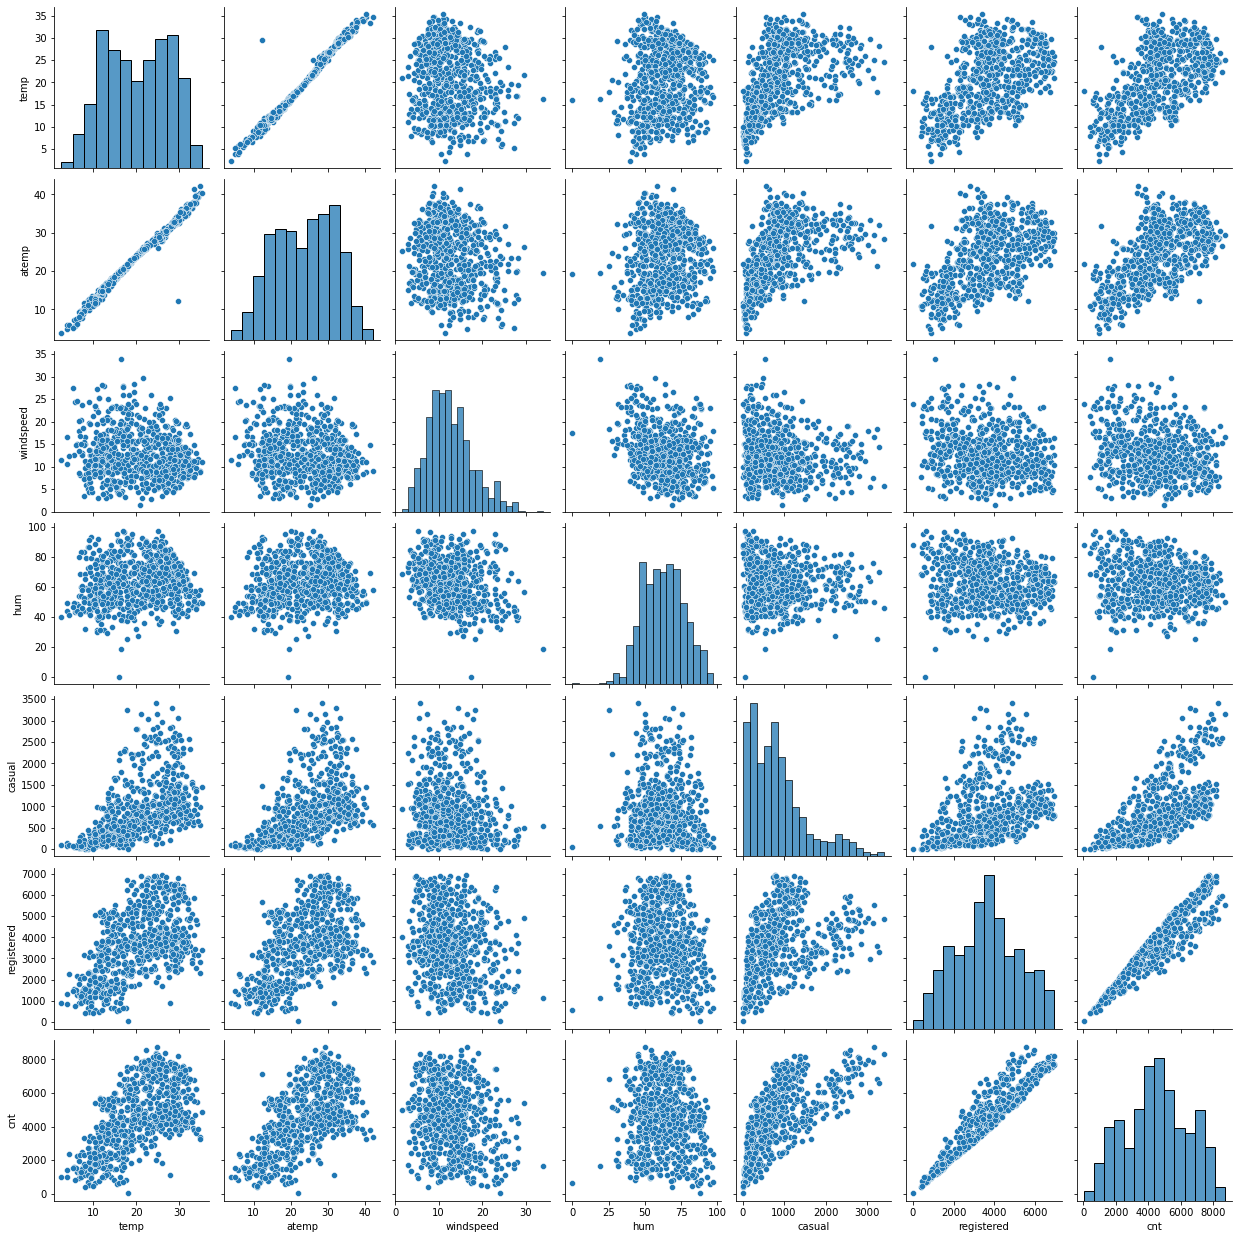

In [9]:
#Doing the pairplot of the random variables to understand about it.

sns.pairplot(ln, vars=["temp","atemp","windspeed","hum","casual","registered","cnt"])
plt.show()

On seeing the plot we can see casual,registered are positively correlated to cnt

We can also say temp is highly correlated with atemp

## Univariate Analysis

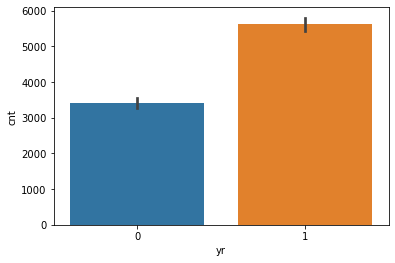

In [10]:
#let us consider year as variable.
sns.barplot('yr','cnt',data=ln)
plt.show()

Here 0 is 2018 and 1 refered as 2019 so on seeing the graph we can say year 2019 sales is higher than 2018  

## Multivariate analysis

<AxesSubplot:>

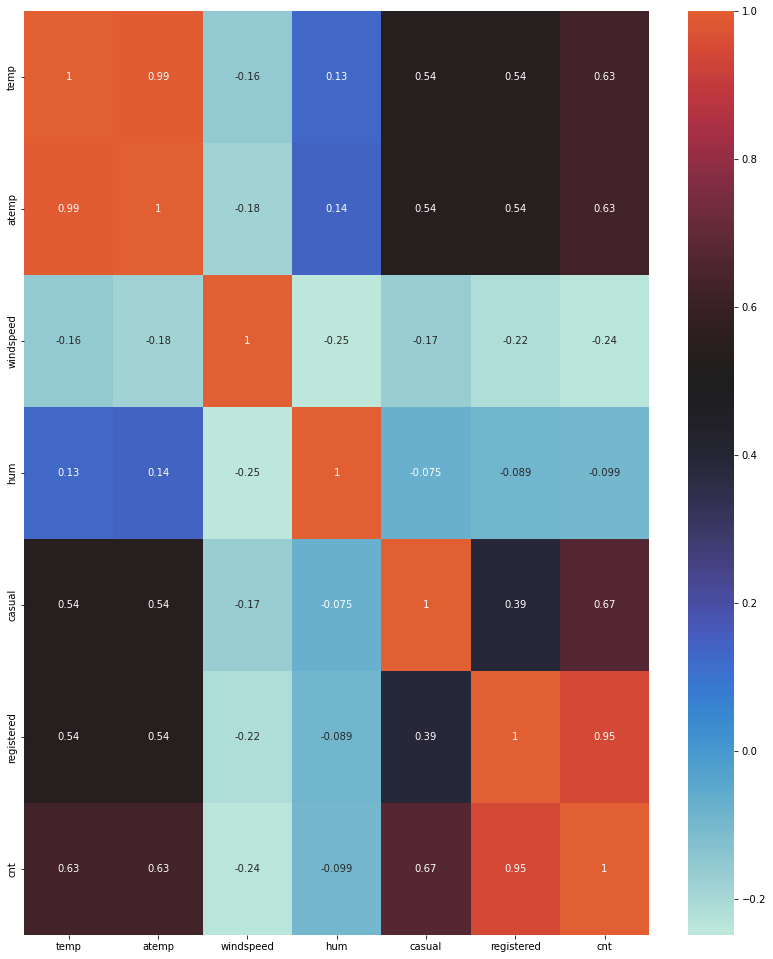

In [11]:
# Analysing multiple float values with help of heat map
plt.figure(figsize=(14,17))
cont_var= ["temp","atemp","windspeed","hum","casual","registered","cnt"]
corr = ln[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

On observing the heatmap, we can say temp, atemp, casual,registered variables are highly correlated to 'cnt' variable

In [12]:
#on comparing casual, registered , cnt we can come to conclustion that cnt is targer variable so dropping it.
ln.drop(['casual','registered'],axis=1,inplace=True)

print("After casual,registered removed\n")
ln.head()

After casual,registered removed



,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
#While checking atemp and temp dropping atemp.
ln.drop(['atemp'],axis=1,inplace=True)

print("After atemp removed\n")
ln.head()

After atemp removed



,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


# Creating dummy variables

In [14]:
#Mapping variables season, month, weathersit, weekday

ln['season']=ln.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
ln['weathersit']=ln.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
ln['weekday']=ln.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

ln.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,1,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,1,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [15]:
#creating dummy
months=pd.get_dummies(ln.mnth,drop_first=True)
weekdays=pd.get_dummies(ln.weekday,drop_first=True)
weather_sit=pd.get_dummies(ln.weathersit,drop_first=True)
seasons=pd.get_dummies(ln.season,drop_first=True)

In [16]:
ln=pd.concat([months,weekdays,weather_sit,seasons,ln],axis=1)
ln.head()

,2,3,4,5,6,7,8,9,10,11,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [17]:
ln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   2              730 non-null    uint8  
 1   3              730 non-null    uint8  
 2   4              730 non-null    uint8  
 3   5              730 non-null    uint8  
 4   6              730 non-null    uint8  
 5   7              730 non-null    uint8  
 6   8              730 non-null    uint8  
 7   9              730 non-null    uint8  
 8   10             730 non-null    uint8  
 9   11             730 non-null    uint8  
 10  12             730 non-null    uint8  
 11  Mon            730 non-null    uint8  
 12  Sat            730 non-null    uint8  
 13  Sun            730 non-null    uint8  
 14  Thu            730 non-null    uint8  
 15  Tue            730 non-null    uint8  
 16  Wed            730 non-null    uint8  
 17  Light Snow     730 non-null    uint8  
 18  Mist + Clo

In [18]:
#Deleting the orginal columns season.weathersit,weekday,mnth
ln.drop(['season'],axis=1,inplace=True)
ln.drop(['weathersit'],axis=1,inplace=True)
ln.drop(['weekday'],axis=1,inplace=True)
ln.drop(['mnth'],axis=1,inplace=True)

ln.head()

,2,3,4,5,6,7,8,9,10,11,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [19]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

ln_train, ln_test = train_test_split(ln, train_size = 0.7, random_state = 100)

In [20]:
print(ln_train.shape)
print(ln_test.shape)

(510, 29)
(220, 29)


In [21]:
#SCALING THE NUMERICAL DATA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

num_vars=['temp','hum','windspeed','cnt']
ln_train[num_vars] = scaler.fit_transform(ln_train[num_vars])
ln_train.head()

,2,3,4,5,6,7,8,9,10,11,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
576,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


In [22]:
#assigning the train values for x and y
y_train = ln_train.pop('cnt')
x_train = ln_train

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [24]:
x_train.head()

,2,3,4,5,6,7,8,9,10,11,...,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed
576,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0.442393,0.640189,0.255342
728,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0.395666,0.504508,0.188475
111,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0.345824,0.751824,0.380981


In [25]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [26]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(x_train, y_train)

In [27]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[(2, False, 6),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 13),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 12),
 (12, False, 11),
 ('Mon', False, 8),
 ('Sat', False, 3),
 ('Sun', False, 7),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 14),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [28]:
col = x_train.columns[rfe.support_]
col

Index([              3,               4,               5,               6,
                     8,               9,    'Light Snow', 'Mist + Cloudy',
              'spring',        'winter',            'yr',       'holiday',
                'temp',           'hum',     'windspeed'],
      dtype='object')

In [29]:
x_train.columns[~rfe.support_]

Index([           2,            7,           10,           11,           12,
              'Mon',        'Sat',        'Sun',        'Thu',        'Tue',
              'Wed',     'summer', 'workingday'],
      dtype='object')

## Model Building

In [30]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe1 = sm.add_constant(x_train_rfe)
# Running the linear model 
lm = sm.OLS(y_train,x_train_rfe1).fit()

In [31]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.5
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          2.50e-187
Time:                        17:00:11   Log-Likelihood:                 510.63
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     494   BIC:                            -921.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2889      0.034      8.599

In [32]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,25.76
12,temp,16.08
14,windspeed,4.69
8,spring,3.61
9,winter,3.28
7,Mist + Cloudy,2.27
10,yr,2.09
4,8,1.93
2,5,1.77
1,4,1.69


In [33]:
#on seeing the VIF values we can say hum column contains high vif value so we're dropping.
x_train_rfe=x_train_rfe.drop(['hum'],axis=1)

In [34]:
import statsmodels.api as sm  
x_train_rfe1 = sm.add_constant(x_train_rfe)

lm1 = sm.OLS(y_train,x_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          8.25e-185
Time:                        17:00:12   Log-Likelihood:                 501.90
No. Observations:                 510   AIC:                            -973.8
Df Residuals:                     495   BIC:                            -910.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2051      0.027      7.517

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,6.47
13,windspeed,4.68
8,spring,2.10
10,yr,2.08
9,winter,1.93
4,8,1.91
3,6,1.67
2,5,1.59
7,Mist + Cloudy,1.55
1,4,1.53


In [36]:
#After the updated vif we could see temp has high VIF so we're dropping the column
x_train_rfe=x_train_rfe.drop(['temp'],axis=1)

In [37]:
#we also see windspeed has vif which greater than 2 so we're dropping that column too
x_train_rfe=x_train_rfe.drop(['windspeed'],axis=1)
x_train_rfe.columns

Index([              3,               4,               5,               6,
                     8,               9,    'Light Snow', 'Mist + Cloudy',
              'spring',        'winter',            'yr',       'holiday'],
      dtype='object')

In [38]:
import statsmodels.api as sm  
x_train_rfe2 = sm.add_constant(x_train_rfe)

lm2 = sm.OLS(y_train,x_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     135.2
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          7.03e-148
Time:                        17:00:12   Log-Likelihood:                 408.68
No. Observations:                 510   AIC:                            -791.4
Df Residuals:                     497   BIC:                            -736.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4612      0.016     29.130

In [39]:
#on seeing the above summary we can say winter has high P value so we're dropping it
x_train_rfe=x_train_rfe.drop(['winter'],axis=1)
x_train_rfe.columns

Index([3, 4, 5, 6, 8, 9, 'Light Snow', 'Mist + Cloudy', 'spring', 'yr',
       'holiday'],
      dtype='object')

In [40]:
#on seeing the above summary we can say month 4 has high P value so we're dropping that too
x_train_rfe=x_train_rfe.drop([4],axis=1)
x_train_rfe.columns

Index([3, 5, 6, 8, 9, 'Light Snow', 'Mist + Cloudy', 'spring', 'yr',
       'holiday'],
      dtype='object')

In [41]:
x_train_rfe3 = sm.add_constant(x_train_rfe)
lm3 = sm.OLS(y_train,x_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.6
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          1.87e-149
Time:                        17:00:12   Log-Likelihood:                 407.17
No. Observations:                 510   AIC:                            -792.3
Df Residuals:                     499   BIC:                            -745.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4482      0.010     44.508

In [42]:
vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,yr,1.52
7,spring,1.39
6,Mist + Cloudy,1.37
0,3,1.22
3,8,1.12
1,5,1.10
4,9,1.10
2,6,1.07
9,holiday,1.03
5,Light Snow,1.02


In [43]:
#we could see some stabiliztion so we gonna add test one by one

#concadinating working day to check model capability
x_train_rfe['workingday']=x_train['workingday']

#checking the linear model summary
x_train_rfe4 = sm.add_constant(x_train_rfe)
lm4 = sm.OLS(y_train,x_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.8
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          5.04e-149
Time:                        17:00:12   Log-Likelihood:                 408.79
No. Observations:                 510   AIC:                            -793.6
Df Residuals:                     498   BIC:                            -742.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4359      0.012     35.801

In [44]:
#it doesn't seems to work since working day has high p value so we're dropping it.
x_train_rfe=x_train_rfe.drop(['workingday'],axis=1)

In [45]:
#concadinating Monday to check model capability
x_train_rfe['Mon']=x_train['Mon']

#checking the linear model summary
x_train_rfe5 = sm.add_constant(x_train_rfe)
lm5 = sm.OLS(y_train,x_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     146.9
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          1.64e-148
Time:                        17:00:12   Log-Likelihood:                 407.58
No. Observations:                 510   AIC:                            -791.2
Df Residuals:                     498   BIC:                            -740.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4497      0.010     43.995

In [46]:
#it doesn't seems to work since Monday has high p value so we're dropping it.
x_train_rfe=x_train_rfe.drop(['Mon'],axis=1)

In [47]:
#concadinating Sunday to check model capability
x_train_rfe['Sun']=x_train['Sun']

#checking the linear model summary
x_train_rfe6 = sm.add_constant(x_train_rfe)
lm6 = sm.OLS(y_train,x_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.7
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          1.30e-150
Time:                        17:00:12   Log-Likelihood:                 412.56
No. Observations:                 510   AIC:                            -801.1
Df Residuals:                     498   BIC:                            -750.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4567      0.010     44.284

In [48]:
#finding VIF for respective model
vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,yr,1.55
7,spring,1.41
6,Mist + Cloudy,1.37
0,3,1.23
3,8,1.12
4,9,1.11
10,Sun,1.11
1,5,1.10
2,6,1.07
9,holiday,1.03


Looks sunday matching with our model so we gonna keep sunday

In [49]:
#concadinating Tuesday to check model capability
x_train_rfe['Tue']=x_train['Tue']

#checking the linear model summary
x_train_rfe7 = sm.add_constant(x_train_rfe)
lm7 = sm.OLS(y_train,x_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.9
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          1.57e-149
Time:                        17:00:12   Log-Likelihood:                 412.60
No. Observations:                 510   AIC:                            -799.2
Df Residuals:                     497   BIC:                            -744.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4574      0.011     43.015

In [50]:
#it doesn't seems to work since Tuesday has high p value so we're dropping it.
x_train_rfe=x_train_rfe.drop(['Tue'],axis=1)

In [51]:
#concadinating Wednesday to check model capability
x_train_rfe['Wed']=x_train['Wed']

#checking the linear model summary
x_train_rfe8 = sm.add_constant(x_train_rfe)
lm8 = sm.OLS(y_train,x_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     138.0
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          1.46e-149
Time:                        17:00:12   Log-Likelihood:                 412.68
No. Observations:                 510   AIC:                            -799.4
Df Residuals:                     497   BIC:                            -744.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4557      0.011     43.189

In [52]:
#it doesn't seems to work since Wednesday has high p value so we're dropping it.
x_train_rfe=x_train_rfe.drop(['Wed'],axis=1)

In [53]:
#concadinating month 2 to check model capability
x_train_rfe[2]=x_train[2]

x_train_rfe9 = sm.add_constant(x_train_rfe)
lm9 = sm.OLS(y_train,x_train_rfe9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     138.0
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          1.47e-149
Time:                        17:00:12   Log-Likelihood:                 412.67
No. Observations:                 510   AIC:                            -799.3
Df Residuals:                     497   BIC:                            -744.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4566      0.010     44.204

In [54]:
#it doesn't seems to work since month 2 has high p value so we're dropping it.
x_train_rfe=x_train_rfe.drop([2],axis=1)

In [55]:
#concadinating month 7 to check model capability
x_train_rfe[7]=x_train[7]

x_train_rfe10 = sm.add_constant(x_train_rfe)
lm10 = sm.OLS(y_train,x_train_rfe10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.3
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          4.96e-155
Time:                        17:00:12   Log-Likelihood:                 425.67
No. Observations:                 510   AIC:                            -825.3
Df Residuals:                     497   BIC:                            -770.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4357      0.011     40.108

In [56]:
#VIF for corresponding models
vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,yr,1.63
7,spring,1.42
6,Mist + Cloudy,1.37
0,3,1.23
3,8,1.13
10,Sun,1.12
1,5,1.11
4,9,1.11
2,6,1.08
11,7,1.08


Looks Month 7 matching with our model so we gonna keep 7

In [57]:
#concadinating month 10 to check model capability
x_train_rfe[10]=x_train[10]

x_train_rfe11 = sm.add_constant(x_train_rfe)
lm11 = sm.OLS(y_train,x_train_rfe11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     149.5
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          4.53e-162
Time:                        17:00:12   Log-Likelihood:                 445.05
No. Observations:                 510   AIC:                            -862.1
Df Residuals:                     496   BIC:                            -802.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4080      0.011     35.892

In [58]:
#VIF for corresponding models
vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,yr,1.68
7,spring,1.45
6,Mist + Cloudy,1.42
0,3,1.23
12,10,1.16
3,8,1.14
10,Sun,1.14
4,9,1.13
1,5,1.12
2,6,1.09


Looks Month 10 matching with our model so we gonna keep 10

In [59]:
#concadinating month 11 to check model capability
x_train_rfe[11]=x_train[11]

x_train_rfe12 = sm.add_constant(x_train_rfe)
lm12 = sm.OLS(y_train,x_train_rfe12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.8
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          3.76e-161
Time:                        17:00:12   Log-Likelihood:                 445.47
No. Observations:                 510   AIC:                            -860.9
Df Residuals:                     495   BIC:                            -797.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4018      0.013     30.281

In [60]:
#it doesn't seems to work since month 11 has high p value so we're dropping it.
x_train_rfe=x_train_rfe.drop([11],axis=1)

In [61]:
#concadinating month 12 to check model capability
x_train_rfe[12]=x_train[12]

x_train_rfe13 = sm.add_constant(x_train_rfe)
lm13 = sm.OLS(y_train,x_train_rfe13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.5
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          5.65e-161
Time:                        17:00:12   Log-Likelihood:                 445.05
No. Observations:                 510   AIC:                            -860.1
Df Residuals:                     495   BIC:                            -796.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4081      0.012     33.058

In [62]:
#it doesn't seems to work since month 12 has high p value so we're dropping it.
x_train_rfe=x_train_rfe.drop([12],axis=1)

Here we're done with the model building part and we can see lm11 results shows us a good fit so we going to keep the model 11

the model 11 p-value and VIF value are in acceptance range.

In [63]:
#we're going to start our prediction
y_train_cnt = lm11.predict(x_train_rfe11)

In [64]:
#importing the required plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

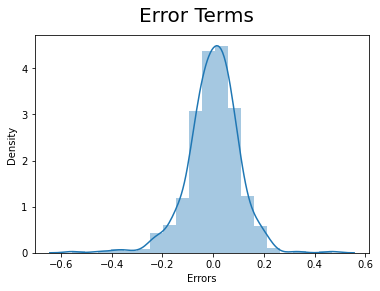

In [65]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 10)

On seeing the plot we can say error terms are distributed normally. 

In [66]:
#Test data is being scaled

num_vars=['temp','hum','windspeed','cnt']
ln_test[num_vars] = scaler.fit_transform(ln_test[num_vars])

In [67]:
#assigning x and y sets

y_test = ln_test.pop('cnt')
x_test = ln_test

In [70]:
#dropping const value and assigning the column values to new variable
x_train_new=x_train_rfe11.drop(['const'], axis=1)

#xreating x_test_new dataframe by dropping variables from X_test

x_test_new = x_test[x_train_new.columns]

#adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

In [71]:
#Making predictions on the chosen model

y_pred = lm11.predict(x_test_new)

Text(0, 0.5, 'y_pred')

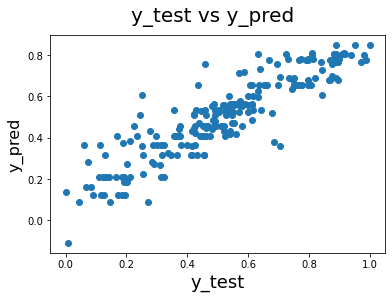

In [72]:
#comparing the predicted data with our test data
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

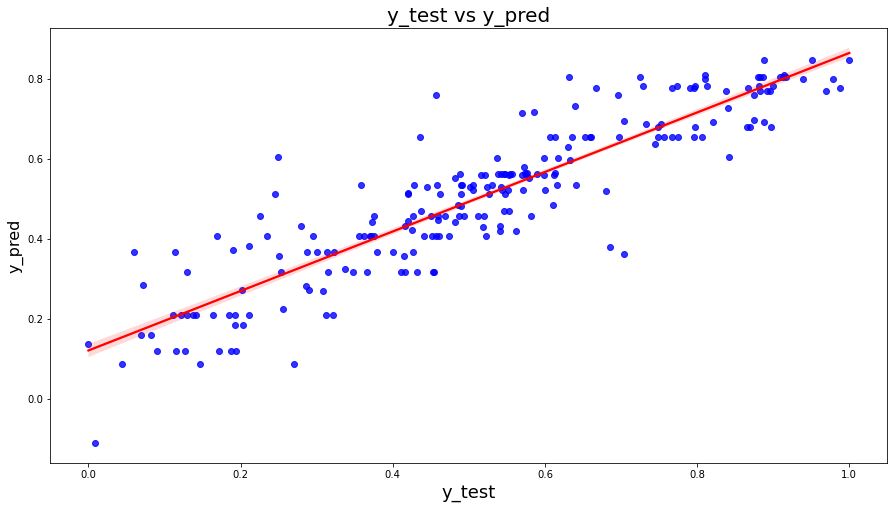

In [73]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

By seeing the above plot we can say our predicted model for demand of bikes worked well

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.8037479070989086

Test r-square value is 0.804

In [79]:
x_test.shape

(220, 28)

In [77]:
# n is number of rows in X

n = x_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = x_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r_squared)*(n-1)/(n-p-1)
adjusted_r2

0.7749779667783298

Test r-square value is 0.775

In [75]:
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     149.5
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          4.53e-162
Time:                        19:20:09   Log-Likelihood:                 445.05
No. Observations:                 510   AIC:                            -862.1
Df Residuals:                     496   BIC:                            -802.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4080      0.011     35.892

As per summary our model's R-squared model is 79.7 and adjusted R-squared model is 79.1

Best equation fits with respect to above summary for cnt= 0.246 X yr -0.0836 X holiday - 0.198 X Spring - 0.321 X Light snow - 0.089 X Mist+Cloudy +0.063 X 3 + 0.123 X 5 +0.151 X 6 +0.153 X 8 + 0.193 X 9 -0.049 X Sun + 0.126 X 7 + 0.115 X 10

Demand of bike can be say using below column values

-yr ,holiday,Spring,Mist+Cloudy,Light Snow,3,5,6,7,8,9,10,sunday
-Demands increases in the month of 3,5,6,7,8,9,10
-Demand decreases if it is holiday, Spring,Light snow, Mist+cloudy, Sunday.

-Demand is higher in month of 3, 5 , 6, 8, 9 ,7 and 10